**SISTEMA RECOMENDADOR PARA UNA APLICACIÓN DE CITAS**

In [ ]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import networkx as nx
from networkx.algorithms import community

Aplicación de citas. ¿Quiénes serán los siguientes pretendientes?

In [ ]:
#Cargamos el dataset
citas = pd.read_csv("datasetCitas.csv")

In [ ]:
#Si quisieramos hacer un análisis rapido de todo nuestro dataframe también podríamos hacer un reporte de perfilado usando ProfileReport

In [ ]:
#Visualizamos las primeras filas
citas.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,height,smokes,user
0,22,single,m,straight,a little extra,anything,socially,never,75.0,sometimes,20471OC
1,35,single,m,straight,average,other,often,sometimes,70.0,no,90676DD
2,38,available,m,straight,thin,anything,socially,NaN,68.0,no,55184RY
3,23,single,m,straight,thin,vegetarian,socially,NaN,71.0,no,47777YP
4,29,single,m,straight,athletic,NaN,socially,never,66.0,no,56729ZW


In [ ]:
print('Filas y columnas en el dataset : ',citas.shape)

Filas y columnas en el dataset :  (59946, 11)


In [ ]:
#Vemos si existen duplicados
duplicados = citas.duplicated()
print(duplicados.sum())

0


In [ ]:
print("---------- Información del Dataset --------------")
citas.info()

---------- Información del Dataset --------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   height       59943 non-null  float64
 9   smokes       54434 non-null  object 
 10  user         59946 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 5.0+ MB


In [ ]:
#Vemos la cantidas de nulos
citas_isnull = citas.isnull().sum().sort_values(ascending = False)
citas_isnull

,0
diet,24395
drugs,14080
smokes,5512
body_type,5296
drinks,2985
height,3
age,0
status,0
sex,0
orientation,0


In [ ]:
#Calculamos el porcentaje de nulos de cada columna
citas_null_porcentaje = round ((citas_isnull/len(citas.axes[0]))*100, 2)
citas_null_porcentaje

,0
diet,40.69
drugs,23.49
smokes,9.19
body_type,8.83
drinks,4.98
height,0.01
age,0.00
status,0.00
sex,0.00
orientation,0.00


In [ ]:
#Total de datos faltantes
valores_totales = np.product(citas.shape)
valores_nulos_totales = citas_isnull.sum()

#Calculamos el porcentaje total de nulos en todo nuestro Dataset
porcentaje_total_null = round((valores_nulos_totales/valores_totales)*100,2)
print(f"Hay un {porcentaje_total_null} de datos faltantes en el conjunto total de nuestro dataset")

Hay un 7.93 de datos faltantes en el conjunto total de nuestro dataset


RESUMEN DE NUESTRAS VARIABLES

El dataset tiene 59,946 registros y 11 columnas. Las columnas incluyen:

1. age: Edad del usuario (entero).

2. status: Estado civil o disponibilidad (texto).

3. sex: Género del usuario (texto).

4. orientation: Orientación sexual (texto: straight, bisexual, gay).

5. body_type: Tipo de cuerpo (texto, con valores nulos).

6. diet: Dieta del usuario (texto, con muchos valores nulos).

7. drinks: Hábitos de consumo de alcohol (texto).

8. drugs: Uso de drogas (texto, con valores nulos).

9. height: Altura del usuario en pulgadas (decimal).

10. smokes: Hábitos de consumo de tabaco (texto).

11. user: Identificador único del usuario (texto).

In [ ]:
#Tendremos que transformar todas las variables categóricas a numéricas mas adelante para poder tratarlo e imputar los nulos por su estadístico a traves de KNNImputer
#Seguimos con la visualización

<Axes: xlabel='orientation', ylabel='count'>

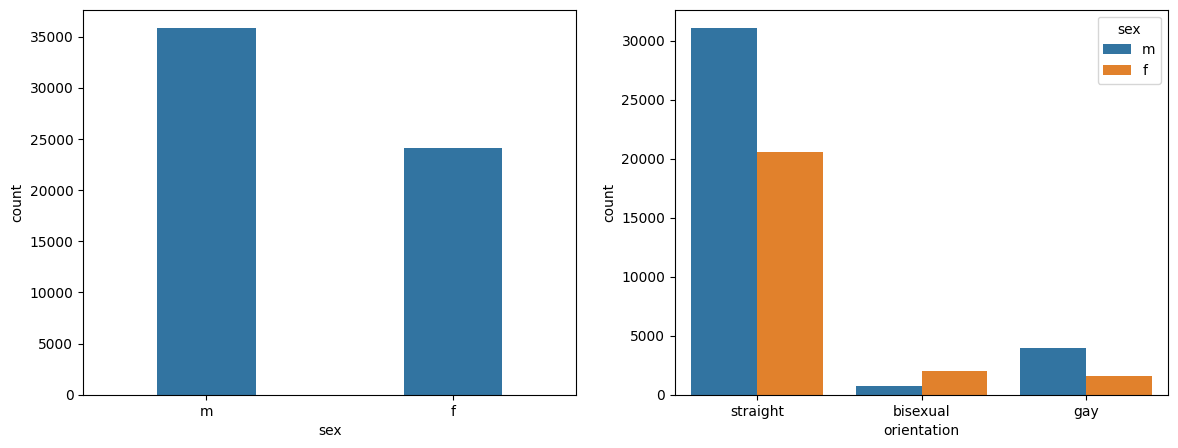

In [ ]:
#Vemos la distribución de sexo y orientación
fig1, ax1 = plt.subplots(ncols=2, figsize=(14,5))
cat_cols = ['sex', 'orientation']
titles = ['Sex distribution', 'Sexual orientation']

sns.countplot(data=citas, x='sex', ax=ax1[0], width=0.4)
sns.countplot(data=citas, x='orientation', hue='sex', ax=ax1[1])

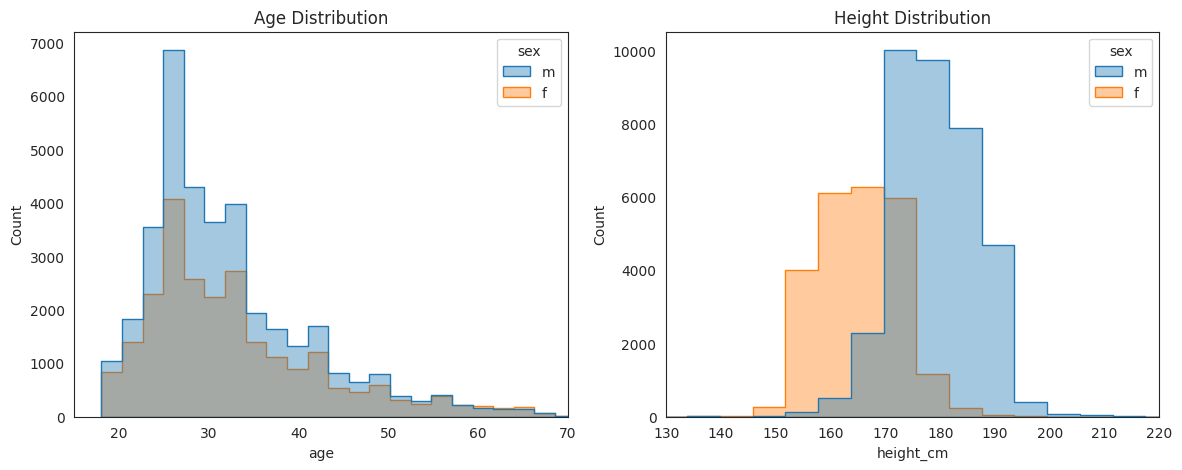

In [ ]:
#Vamos a pasar lo primero Height de pulgadas a cm para visualizarlo en cm
citas['height_cm'] = citas['height'] * 2.54

#Visualizamos la distribucion de age y height_cm

#Configuración de los gráficos
sns.set_style("white")

#Distribución
num_cols = ['age', 'height_cm']
xlims = [(15, 70), (130, 220)]
titles = ['Age Distribution', 'Height Distribution']
fig, axes = plt.subplots(ncols=2, figsize=(14,5), sharey=False)
for i, col in enumerate(num_cols):
    sns.histplot(data=citas, x=col, ax=axes[i], hue='sex', element='step',
                bins=40, alpha=0.4)
    axes[i].set(xlim=xlims[i], title=titles[i])
plt.show()

In [ ]:
#Vamos a eliminar nuestra columna height, ya que ahora tenemos dos columnas height y height_cm, dejaremos la que esta en cm
citas = citas.drop('height', axis = 1)

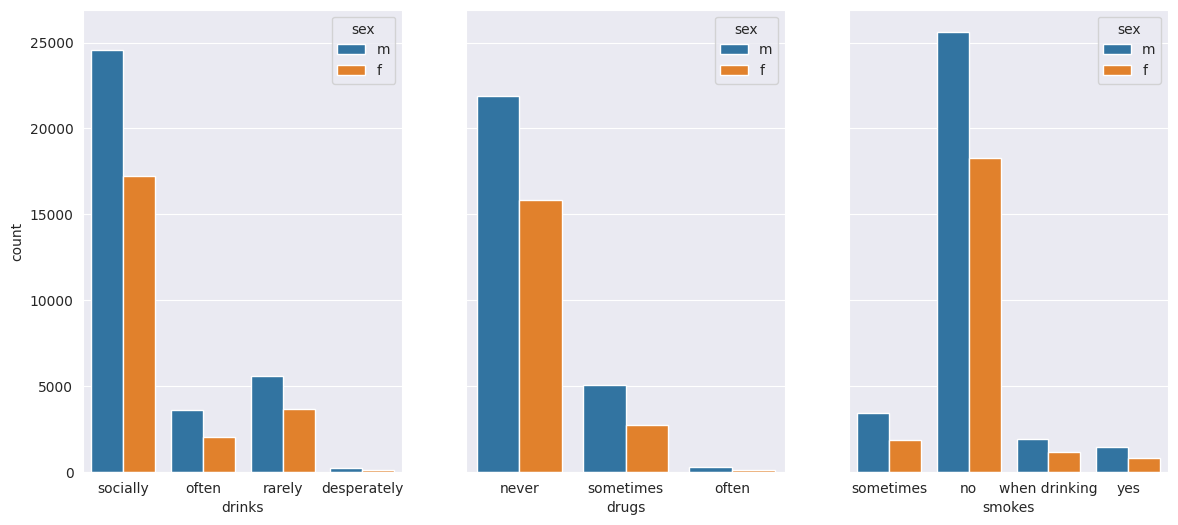

In [ ]:
#Vemos la distribución de las variables drinks, drugs y smokes

#Configuración de los gráficos
sns.set_style("darkgrid")

#Distribución
cat_cols = ['drinks', 'drugs', 'smokes']
fig, axes = plt.subplots(ncols=3, figsize=(14, 6), sharey=True)

for i, col in enumerate(cat_cols):
    sns.countplot(data=citas, x=col, hue='sex', ax=axes[i])

#Visualizamos
plt.show()

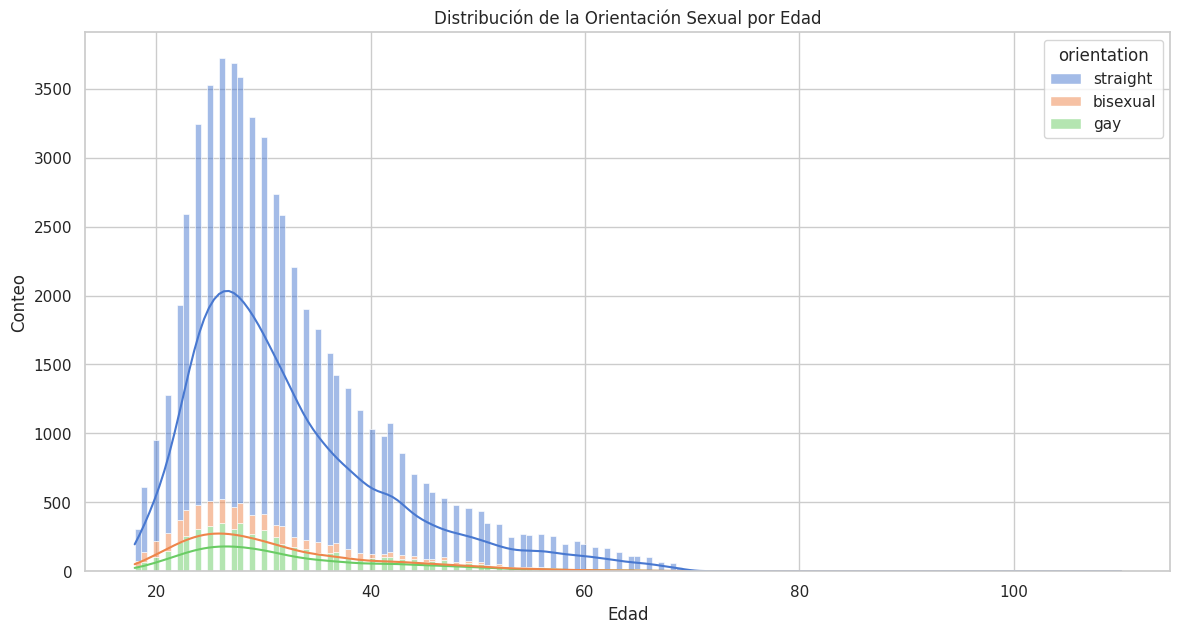

In [ ]:
#Distribución de la orientación sexual por edad

#Configuración de los gráficos
sns.set(style="whitegrid")

#Distribución de la orientación sexual por edad
plt.figure(figsize=(14, 7))
sns.histplot(data=citas, x='age', hue='orientation', multiple='stack', kde=True, palette="muted")
plt.title("Distribución de la Orientación Sexual por Edad")
plt.xlabel("Edad")
plt.ylabel("Conteo")

#Visualizamos
plt.show()

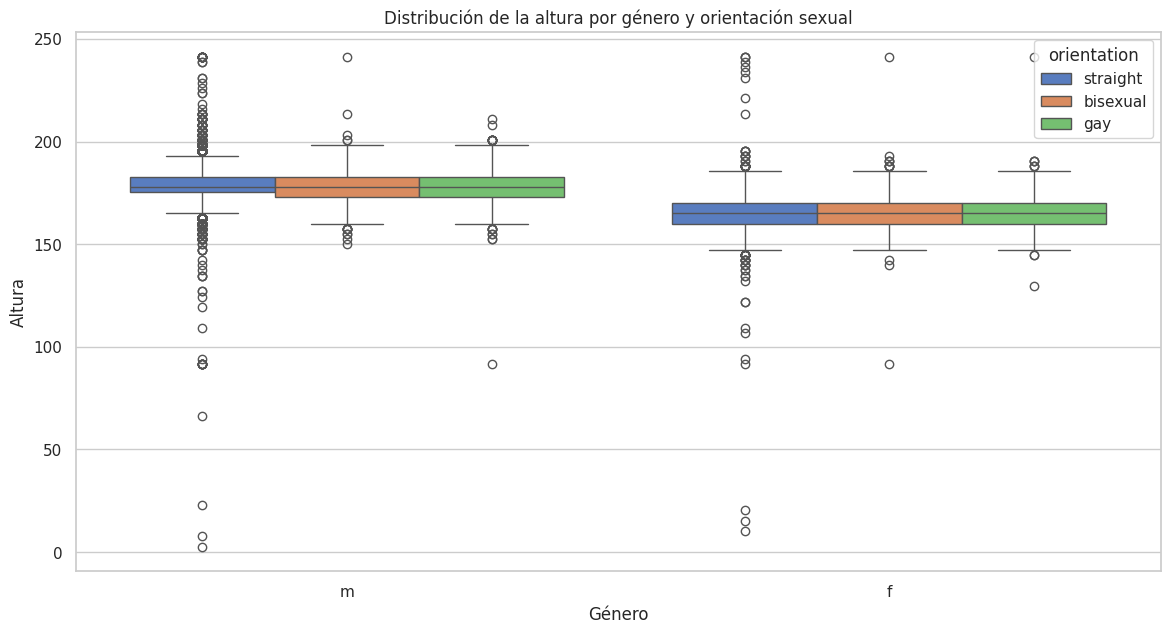

In [ ]:
#Boxplot de la distribución de altura por genero y orientación sexual
plt.figure(figsize=(14, 7))
sns.boxplot(data=citas, x='sex', y='height_cm', hue='orientation', palette="muted")
plt.title("Distribución de la altura por género y orientación sexual")
plt.xlabel("Género")
plt.ylabel("Altura")

plt.show()

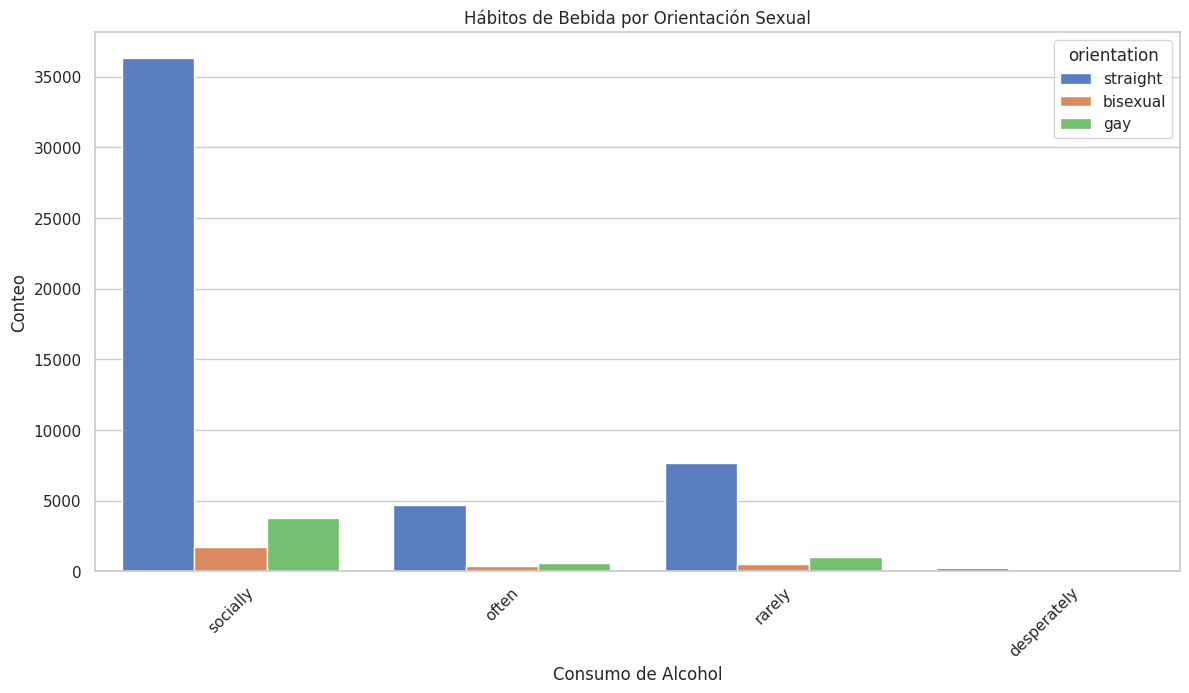

In [ ]:
#Exploración de hábitos (drinks) por orientación sexual

plt.figure(figsize=(14, 7))
sns.countplot(data=citas, x='drinks', hue='orientation', palette="muted")
plt.title("Hábitos de Bebida por Orientación Sexual")
plt.xlabel("Consumo de Alcohol")
plt.ylabel("Conteo")
plt.xticks(rotation=45)

plt.show()

In [ ]:
#Llegados a este punto, una vez nos hemos hecho una idea sobre los datos que tenemos, tenemos varias opciones.
#Tenemos que tranformar nuestro Dataframe y limpiarlo de nulos (KNNImputer) para poder aplicar cosine_similarity
#Podríamos usar la técnica de embeddings para tranformarlo o podemos usar dummies para las categóricas, normalizar las númericas y luego concatenar
#Despues tendremos que hacer un filtrado por orientacion sexual para que nos haga recomendaciones condicionadas a ello
#Una vez trabajado todo esto podemos usar cosine_similarity para hacer nuestro sistema de recomendación basado en contenido

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

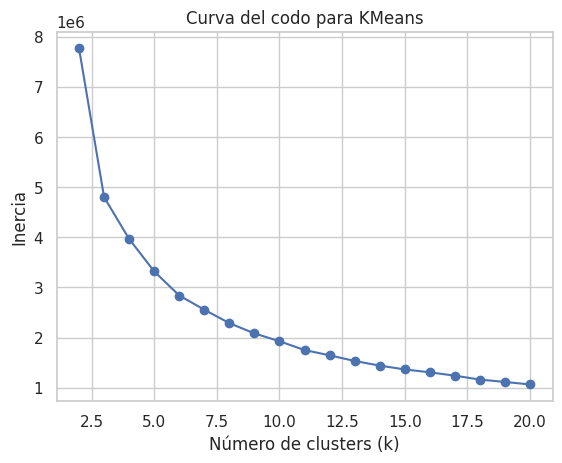

In [ ]:
#Vamos a calcular el valor óptimo de K a traves de la curva del codo al ser no supervisado por tratarse de un sistema recomendador

#Librerias necesarias
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#Vamos a trabajar con una copia
df_k = citas.copy()

#Vamos a convertir las variables categóricas a numéricas usando get dummies
df_k_encoded = pd.get_dummies(df_k, columns=['status', 'orientation', 'sex','body_type', 'diet', 'drinks', 'drugs', 'smokes'], drop_first = True)

#Vamos a normalizar las variables numéricas para ser mas precisos, ya que así escalamos todas las variables a una escala de rango similar.
#Evitamos asi que las que tienen mayor magnitud dominen el calculo de la distancia o similitud, asi también evitamos el sesgo
numeric_cols = ['age', 'height_cm']
scaler = StandardScaler()
df_k[numeric_cols] = scaler.fit_transform(df_k[numeric_cols])

#Concatenar las variables numéricas con las categóricas codificadas
df_k_concat = pd.concat([df_k[numeric_cols], df_k_encoded], axis=1)
df_k_concat = df_k_concat.drop('user', axis = 1)

#Vamos a imputar los valores nulos con KNNImputer, necesitamos el dataset sin nulos para poder sacar el valor de k.
#Podríamos tambien usar un .dropna para eliminar los nulos, sería menos exacto, hemos hecho la prueba con .dropna y la curva es muy parecida.

#Crea un objeto KNNImputer:
imputer_k = KNNImputer(n_neighbors=5)
#Ajusta y transforma el imputador en tus datos:
df_k_imputed = imputer_k.fit_transform(df_k_concat)
#Convierte el resultado de nuevo a un DataFrame:
df_preprocesado = pd.DataFrame(df_k_imputed, columns=df_k_concat.columns)


#Una vez preprocesado calculamos la curva del codo para el valor mas óptimo para K
from sklearn.cluster import KMeans

k_range = range(2, 21)
inertias = []

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_preprocesado)
  inertias.append(kmeans.inertia_)

#Visualizamos la curva
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Curva del codo para KMeans')

plt.show()

In [ ]:
df_k.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,smokes,user,height_cm
0,-1.093898,single,m,straight,a little extra,anything,socially,never,sometimes,20471OC,1.678374
1,0.281370,single,m,straight,average,other,often,sometimes,no,90676DD,0.426738
2,0.598740,available,m,straight,thin,anything,socially,NaN,no,55184RY,-0.073917
3,-0.988108,single,m,straight,thin,vegetarian,socially,NaN,no,47777YP,0.677065
4,-0.353369,single,m,straight,athletic,NaN,socially,never,no,56729ZW,-0.574571


In [ ]:
#Para determinar el número óptimo de grupos, tenemos que seleccionar el valor de k en el «codo»,
#el punto después del cual la distorsión/inercia comienza a disminuir de forma lineal.
#Por lo tanto, para los datos dados, concluimos que el número óptimo es 5

In [ ]:
#Vamos a limpiar los nulos, para ello, queremos imputar los datos faltantes por el estadistico que elijamos en base a un modelo knn
#Primero vamos a dejar nuestro dataset limpio y despues lo dividiremos en subgrupos para despues crear el sistema de recomendacion

#Preparación para la limpieza de datos
df_clean = citas.copy()

#Convertir la columna 'height' a nula si el valor es irracional o negativo
df_clean['height_cm'] = df_clean['height_cm'].apply(lambda x: np.nan if x < 60 or x < 0 else x)

#Separar las variables numéricas y categóricas
numeric_cols = ['height_cm', 'age']
categoric_cols = ['status', 'sex', 'body_type', 'diet', 'drinks', 'drugs', 'smokes']

#Convertir las variables categóricas en variables dummy
df_encoded = pd.get_dummies(df_clean[categoric_cols])

#Concatenar las variables numéricas y categóricas codificadas
df_for_imputation = pd.concat([df_clean[numeric_cols], df_encoded], axis=1)

#Aplicar KNN para imputar datos faltantes
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_for_imputation)

#Reconstruir el DataFrame imputado
df_imputed = pd.DataFrame(df_imputed, columns=df_for_imputation.columns)

#Separar nuevamente las columnas imputadas
df_clean[numeric_cols] = df_imputed[numeric_cols]

#Normalizamos las variables numericas despues de la imputacion.
scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

#Recuperar las columnas categóricas después de la imputación
#Paso 1: Obtener la lista de columnas dummy originales
dummy_cols_by_category = {col: [dummy_col for dummy_col in df_encoded.columns if dummy_col.startswith(col)] for col in categoric_cols}

#Paso 2: Convertir las columnas dummy a su categoría original
for col, dummy_cols in dummy_cols_by_category.items():
    df_clean[col] = df_imputed[dummy_cols].idxmax(axis=1).apply(lambda x: x.split('_')[1])

#Verificación final de datos faltantes
print(df_clean.isnull().sum())

age            0
status         0
sex            0
orientation    0
body_type      0
diet           0
drinks         0
drugs          0
smokes         0
user           0
height_cm      0
dtype: int64


In [ ]:
df_clean.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,smokes,user,height_cm
0,-1.093898,single,m,straight,type,anything,socially,never,sometimes,20471OC,1.698225
1,0.281370,single,m,straight,type,other,often,sometimes,no,90676DD,0.430626
2,0.598740,available,m,straight,type,anything,socially,never,no,55184RY,-0.076414
3,-0.988108,single,m,straight,type,vegetarian,socially,never,no,47777YP,0.684146
4,-0.353369,single,m,straight,type,anything,socially,never,no,56729ZW,-0.583454


In [ ]:
df_imputed.head()

,height_cm,age,status_available,status_married,status_seeing someone,status_single,status_unknown,sex_f,sex_m,body_type_a little extra,...,drinks_often,drinks_rarely,drinks_socially,drugs_never,drugs_often,drugs_sometimes,smokes_no,smokes_sometimes,smokes_when drinking,smokes_yes
0,190.50,22.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,177.80,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,172.72,38.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,180.34,23.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,167.64,29.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#Ahora vamos a hacer grupos para hacerlo mas concreto, lo dividimos por su orientación sexual
#Vamos a codificar las variables categoricas de cada grupo y normalizar las numéricas

#Filtramos por orientación, para ello creamos una condicion booleana que devuelve True para filas donde orientacion tiene el valor marcado,
#En el resto de casos nos daria False.
heterosexuales = df_clean[df_clean['orientation'] == 'straight']
homosexuales = df_clean[df_clean['orientation'] == 'gay']
bisexuales = df_clean[(df_clean['orientation'] == 'bisexual') & ((df_clean['sex'] == 'f') | (df_clean['sex'] == 'm'))] #Concretamos esto para que el sistema entienda la recomendacion a bisexuales

#Codificación de variables categóricas para cada subgrupo, para poder tratarlas mas adelante.
heterosexuales_encoded = pd.get_dummies(heterosexuales.drop(columns=['user' ,'orientation']))
homosexuales_encoded = pd.get_dummies(homosexuales.drop(columns=['user' ,'orientation']))
bisexuales_encoded = pd.get_dummies(bisexuales.drop(columns=['user', 'orientation', 'sex'])) #Eliminamos tambien 'sex' de bisexuales para que no afecte al calculo y recomiende ambos sexos en este caso

#Normalizamos las variables numéricas para ser mas precisos, como anteriormente, asi escalamos todas las variables a una escala de rango similar.
#Evitamos asi que las que tienen mayor magnitud dominen el calculo de la distancia o similitud, asi tambien evitamos el sesgo
heterosexuales_encoded[['age', 'height_cm']] = scaler.fit_transform(heterosexuales_encoded[['age', 'height_cm']])
homosexuales_encoded[['age', 'height_cm']] = scaler.fit_transform(homosexuales_encoded[['age', 'height_cm']])
bisexuales_encoded[['age', 'height_cm']] = scaler.fit_transform(bisexuales_encoded[['age', 'height_cm']])

In [ ]:
#Podemos hacer una comprobacion previa antes de definir nuestra funcion, para ver que nuestros valores estan bien,
#las filas de df_imputed tienen que estar alineadas con las filas de df_clean para que el índice coincida con los usuarios correctos.
#Para ello comprobamos que tengan el mismo numero de filas:
print(df_imputed.shape)
print(df_clean.shape)

(59946, 38)
(59946, 11)


In [ ]:
#cosine_similarity de sklearn.metrics.pairwise: Esta función se utiliza para calcular la similitud coseno entre dos vectores.
#Es una medida comúnmente usada para comparar similitudes en sistemas de recomendación.

#Este codigo define una funcion para recomendar usuarios similares a un usuario especifico en base a la similaridad del coseno.
from sklearn.metrics.pairwise import cosine_similarity

#Función para recomendar dentro de un subgrupo (explicación:)
#recomendar_usuarios: Es el nombre de la función que se encarga de realizar las recomendaciones.
#user_id: El identificador del usuario objetivo al que se le quieren recomendar otros usuarios similares.
#df_imputed: El DataFrame que contiene los datos de todos los usuarios en formato numérico.
#df_clean: El DataFrame original sin codificar, que contiene información completa de los usuarios.
#top_n=4: El número de usuarios similares que la función debe devolver.
def recomendar_usuarios(user_id, df_imputed, df_clean, top_n=4):

    #Extraer las características del usuario dado, es decir user_id, se utiliza user y df_clean para hacer coincidir el identificador con el usuario
    user_data = df_imputed[df_clean['user'] == user_id]

    # Obtener el sexo del usuario
    user_sex = df_clean[df_clean['user'] == user_id]['sex'].values[0]

    #Calcular la similitud coseno entre el usuario dado y todos los demás usuarios del subgrupo
    similitary = cosine_similarity(user_data, df_imputed)

    #Extraer los índices de los usuarios más similares, ordena los usuarios por la similitud coseno en orden descendiente:
    #Esto crea una lista de tuplas, cada tupla contiene un indice (posicion del usuario en el dataframe), y el puntuaje de similitud
    sim_scores = list(enumerate(similitary[0]))
    #Ordena los usuarios por similitud en orden descendente
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #Creamos una lista vacía para almacenar los ID de usuario recomendados
    recommended_users = []

    #Itera sobre los usuarios más similares
    for user_index, sim_score in sim_scores:
        if len(recommended_users) >= top_n:
            break
        #Obtenemos el ID de usuario del usuario similar
        recommended_user_id = df_clean['user'].iloc[user_index]

        #Obtenemos el sexo del usuario similar
        recommended_user_sex = df_clean['sex'].iloc[user_index]

        #Lógica de filtrado según la orientación sexual
        if df_clean[df_clean['user'] == user_id]['orientation'].values[0] == 'straight':
            if recommended_user_sex != user_sex:  # Diferente sexo
                recommended_users.append(recommended_user_id)
        elif df_clean[df_clean['user'] == user_id]['orientation'].values[0] == 'gay':
            if recommended_user_sex == user_sex:  # Mismo sexo
                recommended_users.append(recommended_user_id)
        elif df_clean[df_clean['user'] == user_id]['orientation'].values[0] == 'bisexual':
            if recommended_user_sex == user_sex or recommended_user_sex != user_sex:
                recommended_users.append(recommended_user_id)  # Ambos sexos están bien

    return recommended_users

In [ ]:
#Verificamos el DataFrame de heterosexuales
print(heterosexuales.head(10))
print("Total de usuarios heterosexuales:", len(heterosexuales))

        age     status sex orientation body_type        diet    drinks  \
0 -1.093898     single   m    straight      type    anything  socially   
1  0.281370     single   m    straight      type       other     often   
2  0.598740  available   m    straight      type    anything  socially   
3 -0.988108     single   m    straight      type  vegetarian  socially   
4 -0.353369     single   m    straight      type    anything  socially   
5 -0.353369     single   m    straight      type    anything  socially   
6 -0.035999     single   f    straight      type    anything  socially   
7 -0.141789     single   f    straight      type    anything  socially   
8 -0.882318     single   f    straight      type    anything  socially   
9  0.492950     single   m    straight      type    anything    rarely   

       drugs         smokes     user  height_cm  
0      never      sometimes  20471OC   1.698225  
1  sometimes             no  90676DD   0.430626  
2      never             no  55184R

In [ ]:
#Verificamos el DataFrame de homosexuales
print(homosexuales.head(10))
print("Total de usuarios homosexuales:", len(homosexuales))

          age  status sex orientation body_type      diet    drinks  \
50   0.069791  single   f         gay      type  anything     often   
51   0.598740  single   f         gay      type  anything  socially   
55   0.069791  single   m         gay      type  anything  socially   
69  -0.353369  single   m         gay      type  anything  socially   
81  -0.141789  single   m         gay      type  anything  socially   
83  -0.035999  single   f         gay      type  anything  socially   
155 -0.353369  single   f         gay      type  anything  socially   
167 -0.670738  single   f         gay      type  anything  socially   
175  1.445059  single   m         gay      type  anything  socially   
180 -0.035999  single   m         gay      type  anything  socially   

         drugs smokes     user  height_cm  
50   sometimes     no  90969QJ  -0.583454  
51       never     no  80223IN  -0.836973  
55       never     no  99369OQ   0.430626  
69   sometimes     no  69439BW   1.951745 

In [ ]:
#Verificamos el DataFrame de bisexuales
print(bisexuales.head(10))
print("Total de usuarios bisexuales:", len(bisexuales))

          age          status sex orientation body_type        diet    drinks  \
37  -0.776528          single   m    bisexual      type    anything  socially   
44  -0.353369          single   f    bisexual      type    anything  socially   
48  -0.141789          single   f    bisexual      type    anything  socially   
68  -0.141789          single   f    bisexual      type    anything  socially   
75  -0.353369       available   f    bisexual      type  vegetarian  socially   
77  -0.776528  seeing someone   f    bisexual      type    anything  socially   
124 -0.564949          single   f    bisexual      type    anything  socially   
132  1.127689          single   f    bisexual      type  vegetarian  socially   
153 -0.882318       available   m    bisexual      type    anything  socially   
200 -0.564949          single   f    bisexual      type    anything  socially   

         drugs     smokes     user  height_cm  
37       never         no  80354IU   0.177106  
44   sometim

In [ ]:
#Ejemplo de recomendación para un usuario heterosexual
user_id_example_hetero = heterosexuales['user'].iloc[0]  #Tomando el primer usuario heterosexual como ejemplo
usuarios_recomendados_hetero = recomendar_usuarios(user_id_example_hetero, heterosexuales_encoded, heterosexuales, top_n=4)

#Ejemplo de recomendación para un usuario homosexual
user_id_example_homo = homosexuales['user'].iloc[0]  # Tomando el primer usuario homosexual como ejemplo
usuarios_recomendados_homo = recomendar_usuarios(user_id_example_homo, homosexuales_encoded, homosexuales, top_n=4)

#Ejemplo de recomendación para un usuario bisexual
user_id_example_bi = bisexuales['user'].iloc[0]  #Tomando el primer usuario bisexual como ejemplo
usuarios_recomendados_bi = recomendar_usuarios(user_id_example_bi, bisexuales_encoded, bisexuales, top_n=4)

#Ver las recomendaciones
print("Recomendaciones para usuario heterosexual:", usuarios_recomendados_hetero)
print("Recomendaciones para usuario homosexual:", usuarios_recomendados_homo)
print("Recomendaciones para usuario bisexual:", usuarios_recomendados_bi)

Recomendaciones para usuario heterosexual: ['60200MM', '26933CS', '73101YI', '66875WJ']
Recomendaciones para usuario homosexual: ['90969QJ', '24967OE', '48624UE', '88531RN']
Recomendaciones para usuario bisexual: ['80354IU', '65821XA', '77135LA', '81001PG']


In [ ]:
#Aqui arriba vemos las recomendaciones que nos da nuestro sistema, tenemos cuatro recomendaciones por cada grupo
#Vamos a comprobar que tengan sentido las recomendaciones, visualizando el contenido de ellas, y efectivamente vemos que si concuerdan

In [ ]:
#Ejemplo recomendación primer usuario heterosexual (El primer usuario heterosexual es hombre)

#Definir el ID de usuario que deseamos buscar
user_id = '60200MM'

#Filtrar el DataFrame para obtener las filas donde la columna 'user' coincide con el user_id
resultado = citas[citas['user'] == user_id]

#Ver resultado
print(resultado)

user_id = '26933CS'
resultado = citas[citas['user'] == user_id]
print(resultado)

user_id = '73101YI'
resultado = citas[citas['user'] == user_id]
print(resultado)

user_id = '66875WJ'
resultado = citas[citas['user'] == user_id]
print(resultado)

       age  status sex orientation body_type      diet    drinks  drugs  \
42154   29  single   f    straight  athletic  anything  socially  never   

          smokes     user  height_cm  
42154  sometimes  60200MM     187.96  
       age  status sex orientation body_type      diet    drinks drugs  \
21845   26  single   f    straight     curvy  anything  socially   NaN   

          smokes     user  height_cm  
21845  sometimes  26933CS     182.88  
       age  status sex orientation body_type diet    drinks  drugs     smokes  \
37681   29  single   f    straight  athletic  NaN  socially  never  sometimes   

          user  height_cm  
37681  73101YI     185.42  
       age  status sex orientation body_type diet    drinks  drugs     smokes  \
27464   24  single   f    straight  athletic  NaN  socially  never  sometimes   

          user  height_cm  
27464  66875WJ     180.34  


In [ ]:
#Ejemplo recomendación primer usuario homosexual (El primer usuario homosexual es mujer)

user_id = '90691GO'
resultado = citas[citas['user'] == user_id]
print(resultado)

user_id = '24967OE'
resultado = citas[citas['user'] == user_id]
print(resultado)

user_id = '48624UE'
resultado = citas[citas['user'] == user_id]
print(resultado)

user_id = '88531RN'
resultado = citas[citas['user'] == user_id]
print(resultado)

       age  status sex orientation       body_type      diet drinks  \
35522   35  single   f         gay  a little extra  anything  often   

           drugs smokes     user  height_cm  
35522  sometimes     no  24967OE      165.1  
       age  status sex orientation body_type      diet drinks      drugs  \
49406   36  single   f         gay  athletic  anything  often  sometimes   

      smokes     user  height_cm  
49406     no  48624UE      165.1  
      age  status sex orientation       body_type      diet drinks      drugs  \
1058   29  single   f         gay  a little extra  anything  often  sometimes   

     smokes     user  height_cm  
1058     no  88531RN     172.72  
       age  status sex orientation body_type diet drinks      drugs smokes  \
33358   35  single   f         gay     curvy  NaN  often  sometimes     no   

          user  height_cm  
33358  90691GO     160.02  


In [ ]:
#Ejemplo recomendacion primer usuario bisexual
#Nos recomienda gente de ambos sexos

user_id = '80354IU'
resultado = citas [citas['user'] == user_id]
print(resultado)

user_id = '65821XA'
resultado = citas [citas['user'] == user_id]
print(resultado)

user_id = '77135LA'
resultado = citas [citas['user'] == user_id]
print(resultado)

user_id = '81001PG'
resultado = citas [citas['user'] == user_id]
print(resultado)

    age  status sex orientation body_type      diet    drinks drugs smokes  \
37   25  single   m    bisexual       fit  anything  socially   NaN    NaN   

       user  height_cm  
37  80354IU     175.26  
       age  status sex orientation body_type      diet    drinks  drugs  \
19696   25  single   m    bisexual       fit  anything  socially  never   

      smokes     user  height_cm  
19696     no  65821XA     175.26  
       age  status sex orientation body_type      diet    drinks drugs smokes  \
23800   25  single   f    bisexual       fit  anything  socially   NaN     no   

          user  height_cm  
23800  77135LA     175.26  
       age  status sex orientation body_type      diet    drinks  drugs  \
24570   25  single   f    bisexual      thin  anything  socially  never   

      smokes     user  height_cm  
24570     no  81001PG     175.26  


In [ ]:
#Vamos a comprobar el nivel de similitud de nuestro sistema de recomendacion, para ello podemos usar el mismo metodo de cosine_similitary
#Sacando el promedio de las similitudes, 0 significa que los usuarios no son recomendados, 1 significa que son identicos al objetivo.

#Funcion para evaluar la calidad de las recomendaciones:
def evaluar_similitud_usuarios(user_id, df_encoded, df_clean, top_n=4):
    #Obtener las recomendaciones
    usuarios_recomendados = recomendar_usuarios(user_id, df_encoded, df_clean, top_n)

    #Extraer las características del usuario objetivo
    user_data = df_encoded[df_clean['user'] == user_id]

    #Extraer las características de los usuarios recomendados
    recommended_data = df_encoded[df_clean['user'].isin(usuarios_recomendados)]

    #Calcular la similitud coseno entre el usuario objetivo y los usuarios recomendados
    similitud = cosine_similarity(user_data, recommended_data)

    #Calcular el promedio de las similitudes
    similitud_promedio = similitud.mean()

    return similitud_promedio

In [ ]:
def evaluar_similitud_grupos(heterosexuales, homosexuales, bisexuales, heterosexuales_encoded, homosexuales_encoded, bisexuales_encoded):
    #Evaluación para heterosexuales
    user_id_hetero = heterosexuales['user'].iloc[0]  #Usamos el primer usuario como ejemplo
    similitud_hetero = evaluar_similitud_usuarios(user_id_hetero, heterosexuales_encoded, heterosexuales, top_n=4)

    #Evaluación para homosexuales
    user_id_homo = homosexuales['user'].iloc[0]  #Usamos el primer usuario como ejemplo
    similitud_homo = evaluar_similitud_usuarios(user_id_homo, homosexuales_encoded, homosexuales, top_n=4)

    #Evaluación para bisexuales
    user_id_bi = bisexuales['user'].iloc[0]  #Usamos el primer usuario como ejemplo
    similitud_bi = evaluar_similitud_usuarios(user_id_bi, bisexuales_encoded, bisexuales, top_n=4)

    #Resultados de similitud promedio para cada grupo
    print(f"Similitud promedio de recomendaciones para heterosexuales: {similitud_hetero:.4f}")
    print(f"Similitud promedio de recomendaciones para homosexuales: {similitud_homo:.4f}")
    print(f"Similitud promedio de recomendaciones para bisexuales: {similitud_bi:.4f}")

    return similitud_hetero, similitud_homo, similitud_bi

In [ ]:
#Evaluación de la similitud promedio para cada grupo
similitud_hetero, similitud_homo, similitud_bi = evaluar_similitud_grupos(
    heterosexuales, homosexuales, bisexuales,
    heterosexuales_encoded, homosexuales_encoded, bisexuales_encoded
)

Similitud promedio de recomendaciones para heterosexuales: 0.8639
Similitud promedio de recomendaciones para homosexuales: 0.9876
Similitud promedio de recomendaciones para bisexuales: 1.0000


In [ ]:
#Los valores que nos dan 1 podrian significar dos cosas, o un sobreajuste o que no haya sufiente vulnerabilidad en los datos.
#Ya hemos hecho un analisis de nuestras variables al principio, pero vamos a ir desglosandolo otra vez para ser mas exactos y salir de dudas una vez vistos nuestros resultados.
#Revisar la distribución de valores en las columnas categóricas
for col in categoric_cols:
    print(f"Distribución en {col}:")
    print(citas[col].value_counts())
    print("\n")

#Revisar la distribución en columnas numéricas
citas[numeric_cols].describe()

Distribución en status:
status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64


Distribución en sex:
sex
m    35829
f    24117
Name: count, dtype: int64


Distribución en body_type:
body_type
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64


Distribución en diet:
diet
anything      27881
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: count, dtype: int64


Distribución en drinks:
drinks
socially       41780
rarely          9224
often           5635
desperately      322
Name: count, dtype: int64


Distribución en drugs:
drugs
never        37724
sometimes     7732
often   

,height_cm,age
count,59943.000000,59946.000000
mean,173.470013,32.340290
std,10.146800,9.452779
min,2.540000,18.000000
25%,167.640000,26.000000
50%,172.720000,30.000000
75%,180.340000,37.000000
max,241.300000,110.000000


In [ ]:
#Varianza de las características numéricas
print(citas[numeric_cols].var())

#Varianza de las características codificadas
print(df_encoded.var())

height_cm    102.957549
age           89.355033
dtype: float64
status_available            0.030144
status_married              0.005145
status_seeing someone       0.033246
status_single               0.065858
status_unknown              0.000167
sex_f                       0.240461
sex_m                       0.240461
body_type_a little extra    0.041933
body_type_athletic          0.158291
body_type_average           0.184682
body_type_curvy             0.061175
body_type_fit               0.167082
body_type_full figured      0.016549
body_type_jacked            0.006974
body_type_overweight        0.007352
body_type_rather not say    0.003292
body_type_skinny            0.028765
body_type_thin              0.072413
body_type_used up           0.005887
diet_anything               0.248786
diet_halal                  0.001283
diet_kosher                 0.001915
diet_other                  0.028969
diet_vegan                  0.011574
diet_vegetarian             0.076258
drinks_despe

In [ ]:
#CONCLUSIONES:

**CONCLUSIONES SOBRE LOS RESULTADOS:**

ANÁLISIS DE DISTRIBUCIÓN:

Status:

Hay una alta concentración de usuarios solteros (55,697) en comparación con otras categorías como seeing someone (2,064) y married (310). La mayoría de los usuarios en este grupo están en la misma categoría, lo que sugiere una falta de diversidad. Esto puede llevar a una similitud alta entre las recomendaciones de usuarios solteros, indicando un posible sobreajuste.

status_married: 0.0051, status_seeing someone: 0.0332, status_single: 0.0659, status_unknown: 0.000167: La baja importancia de married y unknown en comparación con single sugiere que el sistema está más orientado hacia las recomendaciones para usuarios solteros. Esto es una señal de vulnerabilidad porque la voz de los usuarios casados o en relaciones no está bien representada.

Sex:

La distribución de género también muestra un desequilibrio: 35,829 hombres frente a 24,117 mujeres. Esta disparidad puede limitar la variabilidad en las recomendaciones y hacer que los modelos se ajusten a patrones específicos de un grupo.

sex_m: 0.2405: La importancia del género masculino es notablemente alta, lo que podría implicar que las recomendaciones están más sesgadas hacia este grupo. Esto es un claro indicativo de vulnerabilidad, ya que el sistema podría no estar considerando adecuadamente las necesidades y preferencias de las usuarias.

Body type:

La distribución de tipos de cuerpo muestra cierta diversidad, pero las categorías como average (14,652) y fit (12,711) tienen muchos más usuarios que otras como jacked (421) o used up (355). Esto sugiere que las recomendaciones pueden estar dominadas por las categorías más grandes, lo que nuevamente podría llevar a un sobreajuste.

body_type_athletic: 0.1583
body_type_fit: 0.1671
body_type_curvy: 0.0612
Esto sugiere que los tipos de cuerpo athletic y fit son considerados más en las recomendaciones. La baja importancia de tipos como curvy y overweight indica una falta de representación de estos grupos en el modelo, lo que puede llevar a que los usuarios con otros tipos de cuerpo se sientan excluidos.

Diet:

La categoría anything (27,881) es mucho más común que otras, como vegan (702). Esto puede resultar en una similitud elevada al recomendar usuarios que se alinean con la dieta más popular, sugiriendo que el sistema podría estar ignorando la diversidad.

Drinks:

La mayoría de los usuarios beben socialmente (41,780), lo que podría llevar a recomendaciones que no exploran adecuadamente las diferencias entre otros patrones de consumo.

Drugs y smokes:

Las categorías de consumo de drogas y tabaco también muestran un predominio de usuarios que no consumen, lo que puede generar recomendaciones muy similares y limitar la exploración de otras preferencias.

diet_halal: 0.0013, drinks_socially: 0.2112, drugs_sometimes: 0.1123, smokes_no: 0.0801: La importancia de las dietas específicas y los hábitos de consumo es relativamente baja en comparación con otras características. Esto puede resultar en recomendaciones que no son adecuadas para personas con restricciones dietéticas o hábitos específicos de consumo.

Características numéricas:

La edad tiene una media de 32 años y una desviación estándar de 9.45, lo que sugiere una población relativamente homogénea en términos de edad. Si la mayoría de los usuarios están en un rango estrecho, esto podría contribuir a recomendaciones muy similares.

height_cm: 102.96: Este valor indica la importancia de la altura en las recomendaciones. Un valor tan alto sugiere que la altura es una característica crucial que influye significativamente en cómo se hacen las recomendaciones. Esto puede ser una señal de que el sistema está sesgado hacia ciertas alturas, lo que podría no reflejar la diversidad de los usuarios.

age: 89.36: Similar a la altura, la edad también es un factor importante en las recomendaciones. La alta puntuación indica que la edad puede estar influyendo fuertemente en el sistema, lo que puede ser problemático si no hay suficientes datos de diferentes grupos de edad.

RECOMENDACIONES SOBRE VULNERABILIDAD DEL DATAFRAME O POSIBLE SOBREAJUSTE:

Modelo: En este caso nos pedían un sistema recomendador basado en contenidos, en lugar de basarse en las interacciones de los usuarios, el sistema basado en contenidos utiliza las características de los items para hacer recomendaciones, lo cual tiene ventajas y desventajas, la ventaja es que no depende de los datos de interacción de otros usuarios, la desventaja es que no puede capturar las preferencias de los usuarios de manera tan efectiva, esto mismo lo vemos reflejado aquí ya que vemos que la similitud se marca por valores muy predominantes que se encuentran desvalanceados.

Vulnerabilidad de Datos: La falta de variedad en las características demográficas y de preferencias (por ejemplo, en la dieta, consumo de alcohol y estado civil) sugiere que nuestros datos pueden no ser lo suficientemente diversos. Esto puede llevar a sesgos en el modelo, ya que las recomendaciones se basan en características que son predominantemente comunes entre los usuarios

Recolección de más datos: Intentar recopilar más datos que representen una mayor diversidad en las características de los usuarios.

Ajuste de modelos: Podemos considerar ajustar los parámetros, para evitar el sobreajuste como el número de vecinos en KNN, hemos cambiado el valor de n vecinos del 5 al 3, viendo que no variaban nuestros resultados. Habría que probar con diferentes algoritmos de recomendación.

Aumento de características: Introducir más características que puedan aportar diversidad, como intereses o preferencias adicionales.

Evaluación de la varianza: Monitorear la varianza en las características y asegúrarse de que no haya atributos que estén limitando la diversidad.